# Spotify Music Recommendation System

## Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.size'] = 12


## Importing the Dataset

In [ ]:
dataset = pd.read_csv('genres_v2.csv')

<ipython-input-4-c11f43c9a8b3>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('genres_v2.csv')


## Data Cleaning

In [ ]:
dataset.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
dataset.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [ ]:
dataset.drop(columns =['id', 'uri', 'track_href', 'analysis_url', 'genre', 'song_name','Unnamed: 0', 'title'], inplace = True )

In [ ]:
dataset = dataset[dataset['key'] != -1]

In [ ]:
datset = dataset[dataset.duplicated(keep = 'first')]

In [ ]:
dataset.drop(columns = ['type'], inplace = True)

In [ ]:
dataset.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4
5,0.721,0.568,0,-11.295,1,0.4140,0.0452,0.212000,0.1280,0.1090,144.915,112511,4
6,0.718,0.668,8,-4.162,1,0.1370,0.0254,0.007800,0.1240,0.0380,130.826,77584,4
7,0.694,0.711,8,-5.525,1,0.2210,0.0397,0.000000,0.1120,0.2830,138.049,127524,3
8,0.774,0.751,1,-2.445,1,0.1980,0.0614,0.000000,0.0728,0.1890,219.960,140326,4
9,0.893,0.907,11,-10.406,1,0.3670,0.1520,0.031100,0.5580,0.3020,199.942,121979,4


array([[<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'duration_ms'}>],
       [<Axes: title={'center': 'time_signature'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

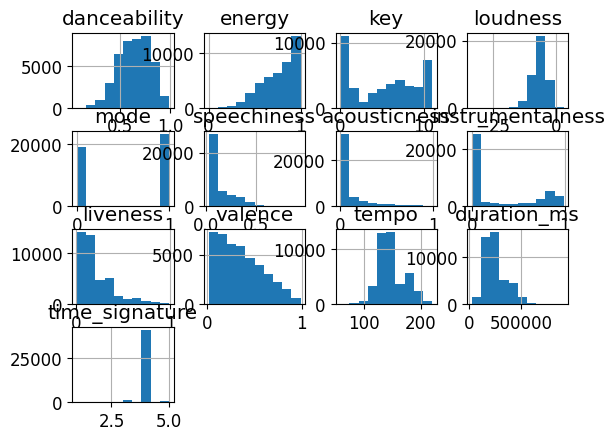

In [ ]:
dataset.hist()

array([<Axes: title={'center': 'danceability'}>,
       <Axes: title={'center': 'energy'}>,
       <Axes: title={'center': 'key'}>,
       <Axes: title={'center': 'loudness'}>,
       <Axes: title={'center': 'mode'}>,
       <Axes: title={'center': 'speechiness'}>,
       <Axes: title={'center': 'acousticness'}>,
       <Axes: title={'center': 'instrumentalness'}>,
       <Axes: title={'center': 'liveness'}>,
       <Axes: title={'center': 'valence'}>,
       <Axes: title={'center': 'tempo'}>,
       <Axes: title={'center': 'duration_ms'}>,
       <Axes: title={'center': 'time_signature'}>], dtype=object)

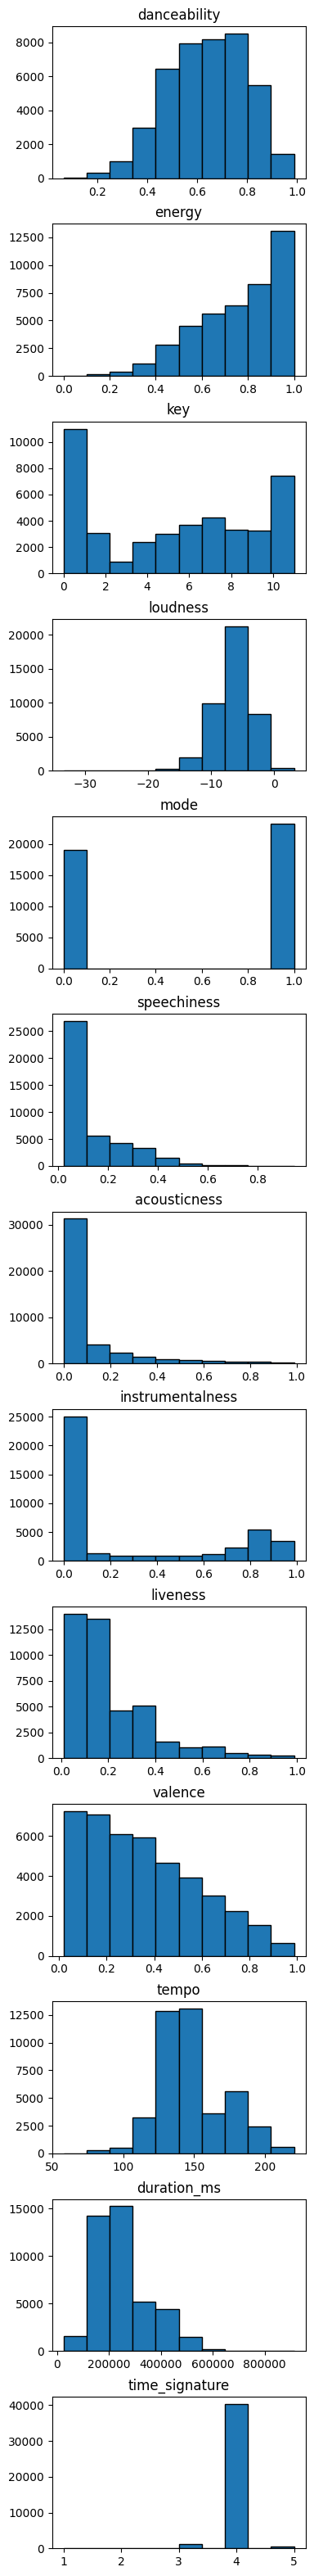

In [ ]:
fig, axis = plt.subplots(13,1, figsize = (4,40))
dataset.hist(ax=axis, edgecolor='black', grid=False)

## Data Transformation

In [ ]:
numerical_columns = ['danceability', 'energy',	'key',	'loudness' ,'speechiness','acousticness' , 'instrumentalness' , 'liveness' , 'valence' , 'tempo' , 'duration_ms' , 'time_signature']

In [ ]:
categorical_data = dataset.drop(columns = numerical_columns)
numerical_data = dataset[numerical_columns]

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
transformed_numerical_data = pt.fit_transform(numerical_data)
dataset_transformed = pd.DataFrame(transformed_numerical_data, columns=numerical_columns)
dataset_normalized = pd.concat([dataset_transformed, categorical_data], axis=1)



In [ ]:
dataset_normalized

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.264072,0.139182,-0.855297,-0.363599,1.707674,0.301037,-0.733619,-1.489419,0.302010,0.463115,-1.552470,0.044244
1,0.475626,-1.405855,0.749821,-0.319981,-0.271309,1.825440,-0.836735,-0.504763,-1.061361,-1.453284,-0.077236,0.044244
2,1.403178,0.690064,0.025655,0.523402,-0.586280,-0.558645,-0.836702,1.262470,-1.641246,2.550853,-2.133616,0.044244
3,-1.050669,-0.068364,-1.659707,0.550179,0.093344,-0.338256,-0.836735,-0.557360,-0.752388,1.565311,-1.570231,-3.513042
4,1.026162,-0.893802,-0.855297,-0.461719,1.444103,1.500236,-0.836735,0.039179,1.042476,0.094656,-1.577611,0.044244
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,-0.745171,-0.562223,-0.244444,0.391130,-1.318305,-0.179716,-0.834011,-0.466125,0.322863,0.179328,0.377218,0.044244
42301,-0.810751,-0.146666,-1.659707,-0.542845,-0.890977,-0.363789,-0.836591,0.383772,0.276791,0.175794,-0.242021,0.044244
42302,-1.685721,0.184864,0.749821,1.172324,-0.833034,-0.290186,-0.834824,1.304715,-1.061361,0.380881,0.035930,0.044244
42303,-1.044902,0.904723,0.279464,0.525599,-1.094989,-0.891305,-0.615943,-1.453528,0.689426,0.180533,0.833197,0.044244


array([<Axes: title={'center': 'danceability'}>,
       <Axes: title={'center': 'energy'}>,
       <Axes: title={'center': 'key'}>,
       <Axes: title={'center': 'loudness'}>,
       <Axes: title={'center': 'speechiness'}>,
       <Axes: title={'center': 'acousticness'}>,
       <Axes: title={'center': 'instrumentalness'}>,
       <Axes: title={'center': 'liveness'}>,
       <Axes: title={'center': 'valence'}>,
       <Axes: title={'center': 'tempo'}>,
       <Axes: title={'center': 'duration_ms'}>,
       <Axes: title={'center': 'time_signature'}>], dtype=object)

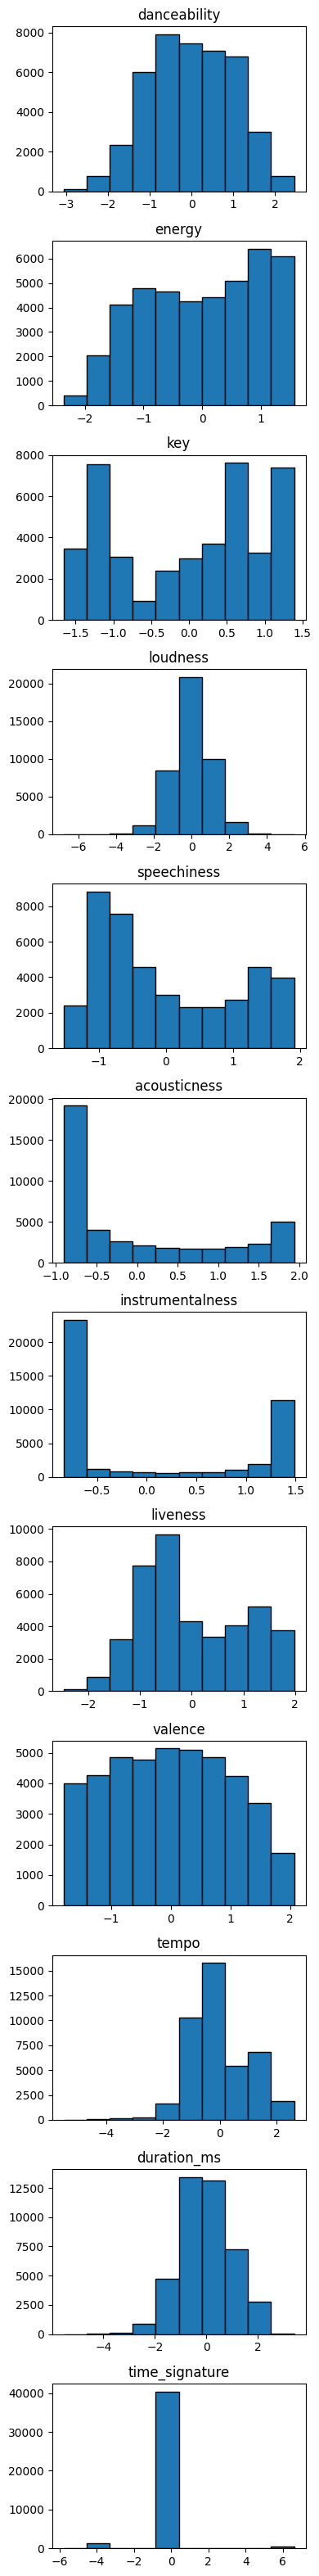

In [ ]:
fig, axis = plt.subplots(12,1, figsize = (4,40))
dataset_normalized.hist(ax=axis, edgecolor='black', grid=False)

In [ ]:
from scipy import stats


z_scores = stats.zscore(dataset_normalized)
abs_z_scores = abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# 'outliers' is a boolean array indicating whether each row has outliers


In [ ]:
outliers.sum()

0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_dataset_normalized = scaler.fit_transform(dataset_normalized)

In [ ]:
scaled_dataset = pd.DataFrame(scaled_dataset_normalized, columns = numerical_columns)
scaled_dataset

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.783514,0.636213,0.263950,0.525432,0.940364,0.424580,0.044392,0.221615,0.542803,0.734387,0.445836,0.470190
1,0.640825,0.243243,0.790634,0.529004,0.365389,0.960737,0.000000,0.442577,0.189836,0.498037,0.610498,0.470190
2,0.808688,0.776327,0.553015,0.598067,0.273878,0.122217,0.000014,0.839155,0.039708,0.991868,0.380970,0.470190
3,0.364603,0.583426,0.000000,0.600260,0.471336,0.199731,0.000000,0.430774,0.269827,0.870321,0.443853,0.182753
4,0.740458,0.373481,0.263950,0.517397,0.863786,0.846357,0.000000,0.564641,0.734504,0.688944,0.443030,0.470190
...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.419891,0.457816,0.464388,0.587236,0.061194,0.255492,0.001173,0.451248,0.548202,0.699387,0.661223,0.470190
42301,0.408022,0.563510,0.000000,0.510754,0.185351,0.190751,0.000062,0.641970,0.536274,0.698951,0.592105,0.470190
42302,0.249674,0.647832,0.790634,0.651206,0.202185,0.216638,0.000823,0.848635,0.189836,0.724245,0.623129,0.470190
42303,0.365647,0.830924,0.636297,0.598247,0.126077,0.005215,0.095053,0.229669,0.643102,0.699536,0.712118,0.470190


In [ ]:
scaled_dataset.describe()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000
mean,0.554748,0.600813,0.544597,0.555207,0.444216,0.318701,0.360222,0.555849,0.464615,0.677271,0.619118,0.466615
std,0.180977,0.254347,0.328132,0.081889,0.290544,0.351720,0.430514,0.224409,0.258896,0.123332,0.111619,0.080803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.415564,0.382664,0.144866,0.504559,0.193169,0.016295,0.000000,0.385876,0.248552,0.589616,0.548655,0.470190
50%,0.553060,0.618256,0.636297,0.556176,0.345706,0.143346,0.019967,0.489748,0.466618,0.673153,0.610911,0.470190
75%,0.699516,0.834927,0.862955,0.606223,0.728206,0.620074,0.919900,0.767628,0.674608,0.756133,0.692435,0.470190
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


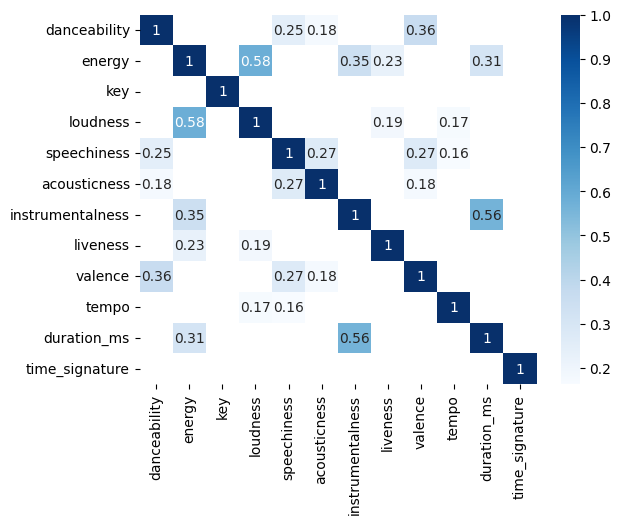

In [ ]:
corr = scaled_dataset.corr()
sns.heatmap(corr[corr > 0.1], cmap="Blues", annot=True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

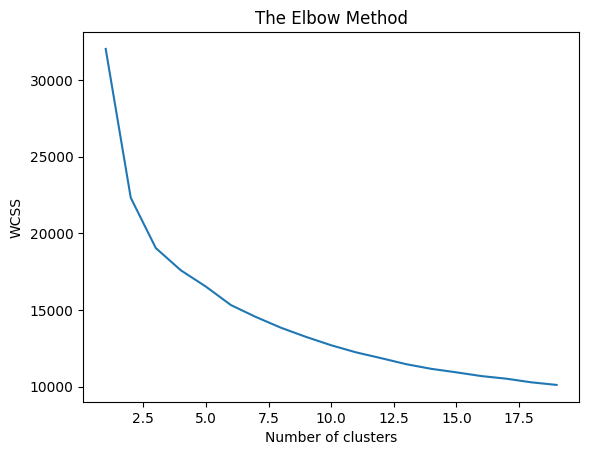

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_dataset)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_dataset)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
